# バイアス下でのロボットを実装

In [ ]:
import sys
sys.path.append("../scripts")
from idealRobot import *
from scipy.stats import expon,norm

: 

In [ ]:
class Robot(VRobot):
    def __init__(self,pose,agent,sensor,color="black",noise_per_meter =5,noise_std =math.pi/60):

        super().__init__(pose,agent,sensor,color)
        self.noise_pdf = expon(scale=1.0/(1e-100 + noise_per_meter))
        self.distance_until_noise = self.noise_pdf.rvs()
        self.theta_noise = norm(scale=noise_std)

    def noise(self,pose,nu,omega, time_interval):
        self.distance_until_noise -= abs(nu)*time_interval + self.r*abs(omega)*time_interval
        if self.distance_until_noise <= 0.0:
            self.distance_until_noise += self.noise_pdf.rvs()
            pose[2] += self.theta_noise.rvs()
        return pose

    def one_step(self,time_interval):
        if not self.agent: return
        obs =self.sensor.data(self.pose) if self.sensor else None
        nu, omega = self.agent.decision(obs)
        self.pose = self.state_transition(nu, omega, time_interval, self.pose)
        self.pose = self.noise(self.pose, nu, omega, time_interval) #追加

<IPython.core.display.Javascript object>


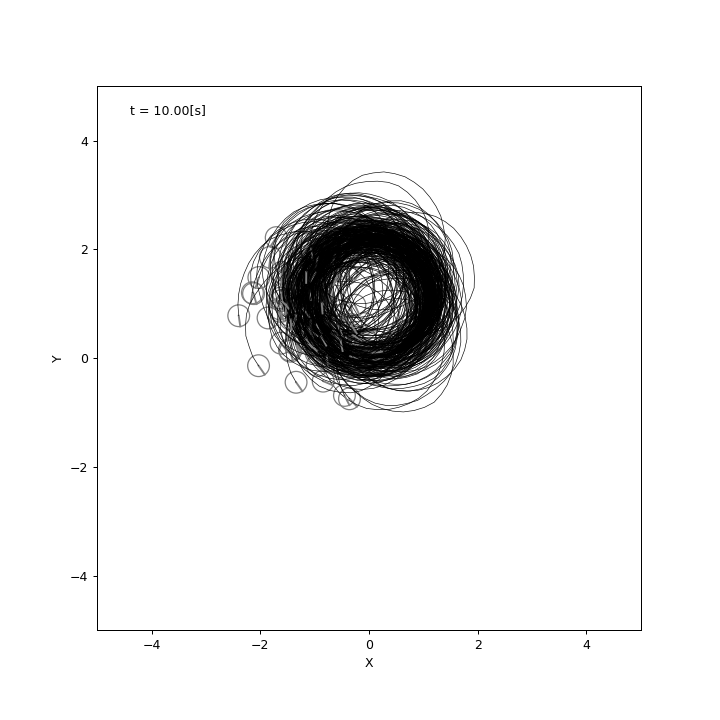

In [ ]:
world = VWorld(10,0.1)
for i in range(100):
    circling = Agent(0.2,10.0/180*math.pi)
    r =Robot(np.array([0,0,0]).T,sensor=None, agent = circling , color="grey")
    world.append(r)
    
world.draw()
    